In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = False)

Mounted at /content/drive


In [ ]:
# extract data from zip file
import zipfile
import os

# Define the path to your zip file and the directory where you want to extract it
zip_file_path = '/content/drive/MyDrive/465 Project/new_archive.zip'
extract_folder_path = '/content/data'

os.makedirs(extract_folder_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

In [ ]:
# lib imports
import torch
import os
import numpy as np
import pandas as pd
import random
import cv2

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

In [ ]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
IMG_COUNT = 480

In [ ]:
# set this between [1, 10] for differently composed datasets
# reference: https://arxiv.org/pdf/2307.05911.pdf
TRAINING_SET = 1

# 10 Different training sets as mentioned in original paper

In [ ]:
#@title This cell is for composing the datasets as mentioned in the original paper

# Set the target image size
target_size = (IMG_WIDTH, IMG_HEIGHT)

# Create empty lists to hold the images and masks
images = []
masks = []

image_dir_ms = '/content/data/GRAIN DATA SET/RG'
mask_dir_ms = '/content/data/GRAIN DATA SET/RGMask'
# vt stands for voronoi tessellation
image_dir_vt = '/content/data/GRAIN DATA SET/AG'
mask_dir_vt = '/content/data/GRAIN DATA SET/AGMask'

image_dir_hed = '/content/data/GRAIN DATA SET/HED_PRE'
mask_dir_hed = '/content/data/GRAIN DATA SET/RGMask'

image_dir_grad = '/content/data/GRAIN DATA SET/GRAD_PRE'
mask_dir_grad = '/content/data/GRAIN DATA SET/RGMask'

image_dir_thresh = '/content/data/GRAIN DATA SET/THRESH_PRE'
mask_dir_thresh = '/content/data/GRAIN DATA SET/RGMask'

if TRAINING_SET==1:
    # 100% Manually Segmented
    print("Selected Training Set 1")
    print("Manually Segmented - 100% (480)")
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_ms)):
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)

    for file in sorted(os.listdir(mask_dir_ms)):

        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)

elif TRAINING_SET==2:
    # 25% Artificial, 75% Manually Segmented (160, 480)
    print("Selected Training Set 2")
    print("Voronoi Tessellation - 25% (160)")
    print("Manually Segmented - 75% (480)")
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_ms)):
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)

    for file in sorted(os.listdir(mask_dir_ms)):

        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        if cnt==160:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_vt)):
        if cnt==160:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

elif TRAINING_SET==3:
    # 50% Artificial, 50% Manually Segmented (480, 480)
    print("Selected Training Set 3")
    print("Voronoi Tessellation - 50% (480)")
    print("Manually Segmented - 50% (480)")
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_ms)):
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)

    for file in sorted(os.listdir(mask_dir_ms)):

        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        if cnt==480:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_vt)):
        if cnt==480:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

elif TRAINING_SET==4:
    # 75% Artificial, 25% Manually Segmented (800, 266)
    print("Selected Training Set 4")
    print("Voronoi Tessellation - 75% (800)")
    print("Manually Segmented - 25% (266)")
    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==266:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==266:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)

    for file in sorted(os.listdir(mask_dir_vt)):

        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)

elif TRAINING_SET==5:
    # 100% Artificial (800)
    print("Selected Training Set 5")
    print("Voronoi Tessellation - 100% (800)")
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)

    for file in sorted(os.listdir(mask_dir_vt)):

        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)

elif TRAINING_SET==6:
    # 50% HED Preprocessed, 50% Manually Segmented (240, 240)
    print("Selected Training Set 6")
    print("HED Preprocessed - 50% (240)")
    print("Manually Segmented - 50% (240)")
    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==240:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==240:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==480:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_hed, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==480:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_hed, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

elif TRAINING_SET==7:
    # 50% Manually Segmented, 25% Artificial, 25% HED Preprocessed(240, 120, 120)
    print("Selected Training Set 7")
    print("Manually Segmented - 50% (240)")
    print("Voronoi Tessellation - 25% (120)")
    print("HED Preprocessed - 25% (120)")
    # Iterate through the directories and load the images and masks
    cnt=0
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==240:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==240:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        if cnt==120:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_vt)):
        if cnt==120:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_hed, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_hed, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


elif TRAINING_SET==8:
    # 50% Manually Segmented, 25% Artificial, 25% GRAD Preprocessed(240, 120, 120)
    print("Selected Training Set 8")
    print("Manually Segmented - 50% (240)")
    print("Voronoi Tessellation - 25% (120)")
    print("GRAD Preprocessed - 25% (120)")
    # Iterate through the directories and load the images and masks
    cnt=0
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==240:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==240:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        if cnt==120:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_vt)):
        if cnt==120:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_grad)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_grad, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_grad)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_grad, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

elif TRAINING_SET==9:
    # 50% Manually Segmented, 25% Artificial, 25% THRESHOLD Preprocessed(240, 120, 120)
    print("Selected Training Set 9")
    print("Manually Segmented - 50% (240)")
    print("Voronoi Tessellation - 25% (120)")
    print("THRESHOLD Preprocessed - 25% (120)")
    # Iterate through the directories and load the images and masks
    cnt=0
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==240:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==240:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_vt)):
        if cnt==120:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_vt, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_vt)):
        if cnt==120:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_vt, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1


    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_thresh)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_thresh, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_thresh)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==360:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_thresh, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

elif TRAINING_SET==10:
    # 50% Manually Segmented, 16.67% HED Prep., 16.67% GRAD Prep.,16.67% THRESHOLD Prep.(240, 80, 80, 80)
    print("Selected Training Set 10")
    print("Manually Segmented - 50% (240)")
    print("HED Preprocessed - 16.67% (80)")
    print("GRAD Preprocessed - 16.67% (80)")
    print("THRESHOLD Preprocessed - 16.67% (80)")
    # Iterate through the directories and load the images and masks
    cnt=0
    for file in sorted(os.listdir(image_dir_ms)):
        if cnt==240:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_ms, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_ms)):
        if cnt==240:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_ms, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==320:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_hed, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_hed)):
        if cnt<240:
            cnt+=1
            continue
        if cnt==320:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_hed, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_grad)):
        if cnt<320:
            cnt+=1
            continue
        if cnt==400:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_grad, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_grad)):
        if cnt<320:
            cnt+=1
            continue
        if cnt==400:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_grad, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1

    cnt = 0
    # Iterate through the directories and load the images and masks
    for file in sorted(os.listdir(image_dir_thresh)):
        if cnt<400:
            cnt+=1
            continue
        if cnt==480:
            break
        # Load the image and resize to the target size
        img = cv2.imread(os.path.join(image_dir_thresh, file))
        img = cv2.resize(img, target_size)

        # Append the resized image to the list of images
        images.append(img)
        cnt+=1

    cnt=0
    for file in sorted(os.listdir(mask_dir_thresh)):
        if cnt<400:
            cnt+=1
            continue
        if cnt==480:
            break
        # Load the corresponding mask and resize to the target size
        mask = cv2.imread(os.path.join(mask_dir_thresh, file))
        mask = cv2.resize(mask, target_size)

        # Append the resized mask to the list of masks
        masks.append(mask)
        cnt+=1



IMG_COUNT = len(images)
print(f"image count : {IMG_COUNT}")

Selected Training Set 1
Manually Segmented - 100% (480)
image count : 480


In [ ]:
# # Set the directories containing the images and masks
# image_dir = '/content/drive/MyDrive/465 Project/ArtificialDataset/GRAIN DATA SET/AG'
# mask_dir = '/content/drive/MyDrive/465 Project/ArtificialDataset/GRAIN DATA SET/AGMask'

# # Set the target image size
# target_size = (IMG_WIDTH, IMG_HEIGHT)

# # Create empty lists to hold the images and masks
# images = []
# masks = []

# # Iterate through the directories and load the images and masks
# for file in sorted(os.listdir(image_dir)):
#     # Load the image and resize to the target size
#     img = cv2.imread(os.path.join(image_dir, file))
#     img = cv2.resize(img, target_size)

#     # Append the resized image to the list of images
#     images.append(img)

# for file in sorted(os.listdir(mask_dir)):

#     # Load the corresponding mask and resize to the target size
#     #mask_file = file.replace('.jpg', '.png')
#     mask = cv2.imread(os.path.join(mask_dir, file))
#     mask = cv2.resize(mask, target_size)

#     # Append the resized mask to the list of masks
#     masks.append(mask)

# IMG_COUNT = len(images)

# Example Image and it's Ground Truth

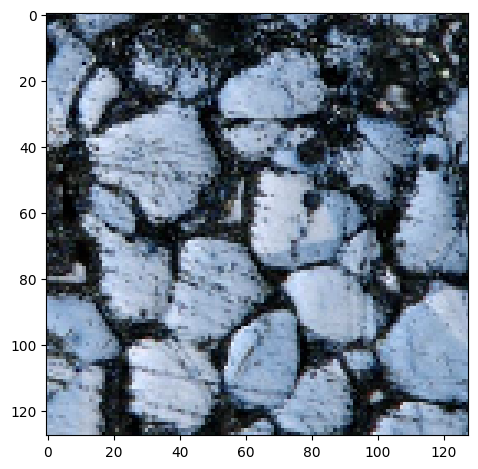

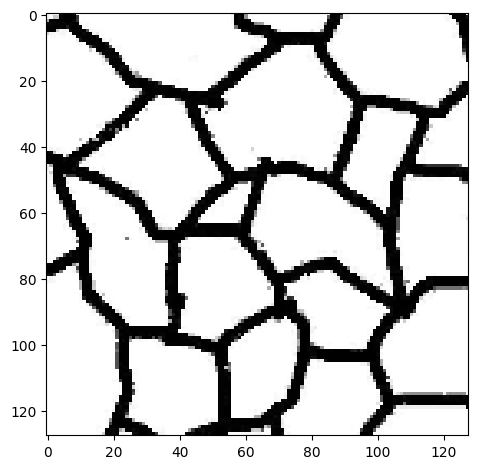

In [ ]:
# example
image_x = random.randint(0, IMG_COUNT)
image_x
imshow(images[image_x])
plt.show()
imshow(masks[image_x])
plt.show()

# SMP Unetplusplus+ resnet152

### Installations:

In [ ]:
pip install -U segmentation-models-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_6

In [ ]:
pip install -U git+https://github.com/qubvel/segmentation_models.pytorch

  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-280kutyr
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-280kutyr
  Resolved https://github.com/qubvel/segmentation_models.pytorch to commit 6db76a1106426ac5b55f39fba68168f3bccae7f8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.3 MB/s eta 0:00:00
  Attempting uninstall: timm
    Found existing installation: timm 0.9.2
    Uninstalling timm-0.9.2:
      Successfully uninstalled timm-0.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
segmentation-models-pytorch 0.3.3 requires timm==0.9.2, but you have timm 0.9.7 which is incompatible.


## Model

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
import segmentation_models_pytorch as smp
model = smp.UnetPlusPlus(
            encoder_name="resnet152",
            encoder_weights="imagenet",
            decoder_use_batchnorm=True,
            decoder_attention_type="scse",
            in_channels=3,
            classes=1,
            activation="sigmoid"
        ).to(device)

# dataset splitting

In [ ]:
# create the X and Y (input and output)

X_train = np.array(images)
Y_train = np.array(masks)
print(X_train.shape, Y_train.shape)
# change the Y to a boolean
Y_train = np.where(Y_train > 245, True, False)

(480, 128, 128, 3) (480, 128, 128, 3)


In [ ]:
# careful to run this cell only once (otherwise shape changes)
X_train = np.transpose(X_train, (0, 3, 1 , 2))
Y_train = np.transpose(Y_train, (0, 3, 1 , 2))
print(X_train.shape, Y_train.shape)

(480, 3, 128, 128) (480, 3, 128, 128)


In [ ]:
#convert the boolean where it insion s true (any of the 3 channels) to a (336, 128, 128, 1)
#basically reduce the 3 channel dimeRGB to just one boolean value

Y_t= np.any(Y_train, axis=1)
print(Y_t.shape)
Y_t = Y_t.reshape(IMG_COUNT, 1, IMG_HEIGHT, IMG_WIDTH)
print(Y_t.shape)


(480, 128, 128)
(480, 1, 128, 128)


In [ ]:
# prompt: Make Dataset from data

from torch.utils.data import Dataset

class GrainDataset(Dataset):
    def __init__(self, images, masks):
        self.images = images
        self.masks = masks

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = torch.from_numpy(self.images[idx]).float()
        mask = torch.from_numpy(self.masks[idx]).float()
        return image, mask

# Create the dataset
dataset = GrainDataset(X_train, Y_t)



In [ ]:
# prompt: create train and validation dataset

from torch.utils.data import random_split

# Split the dataset into train and validation sets
train_size = int(0.8 * len(dataset))
r = len(dataset) - train_size
val_size = int(0.5 * r)
test_size = int(0.5 * r)
train_dataset, val_dataset,test_dataset = random_split(dataset, [train_size, val_size,test_size])



In [ ]:
print(f"Train : {train_size}")
print(f"Val: {val_size}")
print(f"Test: {test_size}")

Train : 384
Val: 48
Test: 48


In [ ]:
# Define callbacks
class ModelCheckpoint:
    def __init__(self, checkpoint_path):
        self.checkpoint_path = checkpoint_path
        self.best_loss = float('inf')

    def __call__(self, model, epoch, train_loss, val_loss):
        if val_loss < self.best_loss:
            torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'train_loss' : train_loss,
            'val_loss': val_loss,
            }, self.checkpoint_path)
            print("Checkpoint saved")
            self.best_loss = val_loss

from datetime import datetime
checkpoint_path = f'/content/drive/MyDrive/465 Project/Unet++ Checkpoints/TrainingSet{TRAINING_SET}_{datetime.now().strftime("%d%m%Y %H:%M:%S")}.pt'
# print(checkpoint_path)
# os.makedirs("/content/drive/MyDrive/465 Project", exist_ok=True) # already exists
checkpoint_dir = os.path.dirname(checkpoint_path)

checkpointer = ModelCheckpoint(checkpoint_path)


In [ ]:
print(f"current: {checkpoint_path}")

current: /content/drive/MyDrive/465 Project/Unet++ Checkpoints/TrainingSet1_21042024 16:52:38.pt


In [ ]:
from torch.utils.data import DataLoader

# Define DataLoader for training and validation sets
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
# test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Dice Loss func

In [ ]:
import torch
import torch.nn.functional as F

def continuous_dice_loss(output, target):
    """
    Calculates the Continuous Dice Loss for a batch of predictions and targets.

    Args:
    output (torch.Tensor): Model's probabilistic output, values between [0, 1].
    target (torch.Tensor): Ground truth binary tensor, values {0, 1}.

    Returns:
    torch.Tensor: Continuous Dice Loss.
    """
    # Flatten the tensors to calculate the loss on a per-image basis
    output_flat = output.view(output.size(0), -1)
    target_flat = target.view(target.size(0), -1)

    # Calculate intersection and cardinality (or area)
    intersection = torch.sum(output_flat * target_flat, dim=1)
    cardinality_output = torch.sum(output_flat, dim=1)
    cardinality_target = torch.sum(target_flat, dim=1)

    # Calculate c as per the definition
    c_numerator = torch.sum(output_flat * target_flat, dim=1)
    c_denominator = torch.sum(output_flat * torch.sign(target_flat), dim=1)

    # Avoid division by zero
    c_denominator = torch.where(c_denominator == 0, torch.ones_like(c_denominator), c_denominator)
    c = c_numerator / c_denominator

    # Compute continuous Dice coefficient
    cDC = (2. * intersection) / (c * cardinality_target + cardinality_output)

    # Compute loss as 1 - cDC
    cDL = 1 - cDC

    # Average the loss over the batch
    return cDL.mean()


def combined_dice_ce_loss(output, target, dice_weight=0.5, ce_weight=0.5):
    ce_loss = F.binary_cross_entropy(output, target)
    dice_loss = continuous_dice_loss(output, target)
    combined_loss = dice_weight * dice_loss + ce_weight * ce_loss
    return combined_loss


#Training Loop

In [ ]:
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement.
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = float('inf')
        self.delta = delta

    def __call__(self, val_loss):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss)
            self.counter = 0

    def save_checkpoint(self, val_loss):
        """Saves model when validation loss decrease."""
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model...')
        self.val_loss_min = val_loss

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(),lr=0.0001)
criterion = combined_dice_ce_loss
early_stopper = EarlyStopping(patience=10, verbose=True)
# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0

    # Training
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        # print(inputs.shape)
        outputs = model(inputs)
        loss = criterion(outputs, targets,1,0)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets,1,0)
            val_loss += loss.item() * inputs.size(0)
    # Average losses
    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)

    # Print epoch statistics
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    # Call the ModelCheckpoint callback
    # checkpointer(model,epoch, train_loss, val_loss)
        # Check for early stopping
    early_stopper(val_loss)
    if early_stopper.early_stop:
        print("Early stopping")
        break

Epoch [1/30], Train Loss: 0.1645, Val Loss: 0.1523
Validation loss decreased (inf --> 0.152307).  Saving model...
Epoch [2/30], Train Loss: 0.1384, Val Loss: 0.1385
Validation loss decreased (0.152307 --> 0.138488).  Saving model...
Epoch [3/30], Train Loss: 0.1223, Val Loss: 0.1328
Validation loss decreased (0.138488 --> 0.132824).  Saving model...
Epoch [4/30], Train Loss: 0.1072, Val Loss: 0.1252
Validation loss decreased (0.132824 --> 0.125163).  Saving model...
Epoch [5/30], Train Loss: 0.0940, Val Loss: 0.1239
Validation loss decreased (0.125163 --> 0.123929).  Saving model...
Epoch [6/30], Train Loss: 0.0830, Val Loss: 0.1193
Validation loss decreased (0.123929 --> 0.119344).  Saving model...
Epoch [7/30], Train Loss: 0.0744, Val Loss: 0.1164
Validation loss decreased (0.119344 --> 0.116377).  Saving model...
Epoch [8/30], Train Loss: 0.0671, Val Loss: 0.1158
Validation loss decreased (0.116377 --> 0.115786).  Saving model...
Epoch [9/30], Train Loss: 0.0618, Val Loss: 0.1137
Va

In [ ]:
# checkpointer(model,epoch, train_loss, val_loss)

Checkpoint saved


In [ ]:
# current_checkpoint = torch.load(checkpoint_path)
# model.load_state_dict(current_checkpoint['model_state_dict'])
# model.eval()
# print(current_checkpoint['train_loss'],current_checkpoint['val_loss'])

0.03722295646245281 0.10303842276334763


In [ ]:
def display_results(image, ground_truth_mask, predicted_mask):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Display input image
    axes[0].imshow(np.transpose(image, (1, 2, 0)))
    axes[0].set_title('Input Image')

    # Display ground truth mask
    axes[1].imshow(np.squeeze(ground_truth_mask))
    axes[1].set_title('Ground Truth Mask')

    # Display predicted mask
    axes[2].imshow(np.squeeze(predicted_mask))
    axes[2].set_title('Predicted Mask')

    plt.show()

# Results

#### Train Set Load

In [ ]:
# dataset = GrainDataset(X_rg, Y_t)
rg_val_loader = DataLoader(test_dataset,batch_size=16, shuffle=False)

#### continuous Dice Score


In [ ]:
import torch

def continuous_dice_coefficient(A, B):
    """
    Calculates the Continuous Dice Coefficient for tensors A and B.

    Args:
    A (torch.Tensor): Binary ground truth tensor.
    B (torch.Tensor): Probabilistic map tensor, values between [0, 1].

    Returns:
    float: Continuous Dice Coefficient.
    """
    size_of_A_intersect_B = torch.sum(A * B)
    size_of_A = torch.sum(A)
    size_of_B = torch.sum(B)

    if size_of_A_intersect_B > 0:
        c = torch.sum(A * B) / torch.sum(A * torch.sign(B))
    else:
        c = 1.0

    cDC = (2 * size_of_A_intersect_B) / (c * size_of_A + size_of_B)
    return cDC.item()



In [ ]:
import torch


continuous_dice_coefficients = []
total_num_samples = test_dataset

for images, masks in rg_val_loader:
    batch_size = images.size(0)  # Get the actual batch size
    # total_num_samples += batch_size

    with torch.no_grad():
        images = images.to(device)
        masks = masks.to(device)

        # Forward pass
        preds = model(images)

        for ind in range(len(preds)):
            pred_probs = (preds[ind]).float()
            gt_tensor = masks[ind].to(torch.int64)

            continuous_dice = continuous_dice_coefficient(gt_tensor,pred_probs)
            continuous_dice_coefficients.append(continuous_dice)


average_continuous_dice_coefficient = torch.mean(torch.tensor(continuous_dice_coefficients))

print(f"Continuous Dice Score:")
print(f'Average continuous dice coefficient for the data it was trained on: {average_continuous_dice_coefficient}')


Continuous Dice Score:
Average continuous dice coefficient for the data it was trained on: 0.9499767422676086


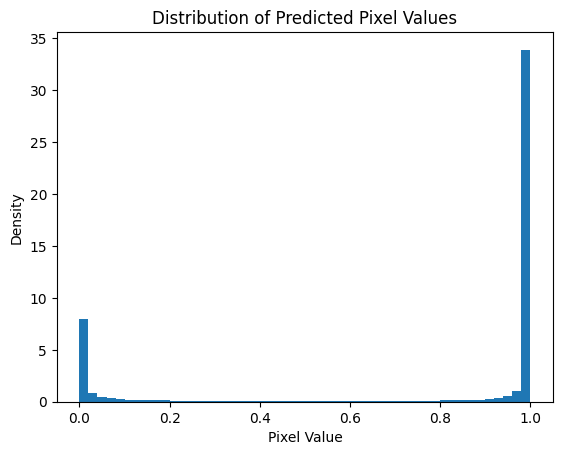

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt


model.eval()

all_preds = []

with torch.no_grad():
    for images, _ in val_loader:
        images = images.to(device)
        preds = model(images)
        all_preds.extend(preds.flatten().cpu().numpy())  # Flatten and move to CPU

all_preds_np = np.array(all_preds)

# Plot the histogram
plt.hist(all_preds_np, bins=50, density=True)
plt.title('Distribution of Predicted Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Density')
plt.show()


#### torch metrics Dice Score

##### installation

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 7.7 MB/s eta 0:00:00


##### Dice & IoU

In [ ]:
# dataset = GrainDataset(X_rg, Y_t)
# rg_val_loader = DataLoader(dataset,batch_size=16, shuffle=False)

from torchmetrics.functional import dice
from torchmetrics.functional import jaccard_index
def cal(threshold):
  total_jaccard_score = 0.0
  total_dice_score = 0.0
  total_num_samples = 0

  for images, masks in rg_val_loader:
      batch_size = images.size(0)  # Get the actual batch size
      total_num_samples += batch_size

      with torch.no_grad():
          images = images.to(device)
          masks = masks.to(device)

        # Forward pass
          preds = model(images)

          for ind in range(len(preds)):
              pred_tensor = (preds[ind] > threshold).float()
              gt_tensor = masks[ind].to(torch.int64)  # Convert mask tensor to integer tensor

              dice_score = dice(pred_tensor, gt_tensor)
              total_dice_score += dice_score.item()

              jaccard_score = jaccard_index(pred_tensor, gt_tensor, task='binary')
              total_jaccard_score += jaccard_score.item()

  average_dice_score = total_dice_score / total_num_samples
  average_jaccard_score = total_jaccard_score / total_num_samples

  print(f"Threshold: {threshold}")
  print(f"Total Number samples: {total_num_samples}")
  print(f"Average Dice Score: {average_dice_score}")
  print(f"Average Jaccard Index: {average_jaccard_score}")

In [ ]:
for i in np.arange(0.0, 1.1, 0.1):
    cal(i)

Threshold: 0.0
Total Number samples: 48
Average Dice Score: 0.8642947599291801
Average Jaccard Index: 0.7613538106282552
Threshold: 0.1
Total Number samples: 48
Average Dice Score: 0.9064387281735738
Average Jaccard Index: 0.8293633162975311
Threshold: 0.2
Total Number samples: 48
Average Dice Score: 0.9066165251036485
Average Jaccard Index: 0.8296740315854549
Threshold: 0.30000000000000004
Total Number samples: 48
Average Dice Score: 0.9062554302314917
Average Jaccard Index: 0.8290743331114451
Threshold: 0.4
Total Number samples: 48
Average Dice Score: 0.9059338308870792
Average Jaccard Index: 0.8285410292446613
Threshold: 0.5
Total Number samples: 48
Average Dice Score: 0.9053793487449487
Average Jaccard Index: 0.8276187814772129
Threshold: 0.6000000000000001
Total Number samples: 48
Average Dice Score: 0.9047468528151512
Average Jaccard Index: 0.8265672884881496
Threshold: 0.7000000000000001
Total Number samples: 48
Average Dice Score: 0.9038530041774114
Average Jaccard Index: 0.825